In [1]:
import sys
!{sys.executable} -m pip install astropy
from astropy.table import Table
import numpy as np
import pandas as pd
import scipy as scipy
from scipy import optimize
np.set_printoptions(threshold=np.inf)

In [48]:
star2 = Table.read("/Users/edm/Desktop/Gaia Data/Original/GCNS_cat.fits", format='fits')
star2['row_num'] = np.arange(len(star2))
print(star2)

     SOURCE_ID               RA            RA_ERROR  ... W4SIGMPRO_WISE row_num
------------------- -------------------- ----------- ... -------------- -------
2334666126716440064 0.002564982563575165  0.03305146 ...            nan       0
2341871673090078592 0.005120969206988805  0.42836607 ...          0.077       1
 530861741656374272 0.005636916793870935 0.009510912 ...          0.333       2
2745400068346761216 0.009336098664272003 0.037925914 ...            nan       3
2855176271335676800 0.013536449221259565 0.028638573 ...            nan       4
4616265759236854016 0.014892523503159586  0.82731885 ...            nan       5
2875125810310195712   0.0157909355502497   0.1568653 ...          0.085       6
2335003848584711040 0.015910163631347198 0.022697238 ...            nan       7
2773793203786254208 0.016520119186351646 0.058131374 ...            nan       8
2740326852975975040  0.01967903634957893 0.024653591 ...            nan       9
                ...                  ...

In [49]:
print(star2.colnames)

['SOURCE_ID', 'RA', 'RA_ERROR', 'DEC', 'DEC_ERROR', 'PARALLAX', 'PARALLAX_ERROR', 'PMRA', 'PMRA_ERROR', 'PMDEC', 'PMDEC_ERROR', 'PHOT_G_MEAN_MAG', 'PHOT_G_MEAN_FLUX_OVER_ERROR', 'PHOT_BP_MEAN_MAG', 'PHOT_BP_MEAN_FLUX_OVER_ERROR', 'PHOT_RP_MEAN_MAG', 'PHOT_RP_MEAN_FLUX_OVER_ERROR', 'PHOT_BP_RP_EXCESS_FACTOR', 'RUWE', 'IPD_FRAC_MULTI_PEAK', 'ADOPTEDRV', 'ADOPTEDRV_ERROR', 'ADOPTEDRV_REFNAME', 'RADIAL_VELOCITY_IS_VALID', 'GCNS_PROB', 'WD_PROB', 'DIST_1', 'DIST_16', 'DIST_50', 'DIST_84', 'XCOORD_50', 'XCOORD_16', 'XCOORD_84', 'YCOORD_50', 'YCOORD_16', 'YCOORD_84', 'ZCOORD_50', 'ZCOORD_16', 'ZCOORD_84', 'UVEL_50', 'UVEL_16', 'UVEL_84', 'VVEL_50', 'VVEL_16', 'VVEL_84', 'WVEL_50', 'WVEL_16', 'WVEL_84', 'NAME_GUNN', 'REFNAME_GUNN', 'GMAG_GUNN', 'E_GMAG_GUNN', 'RMAG_GUNN', 'E_RMAG_GUNN', 'IMAG_GUNN', 'E_IMAG_GUNN', 'ZMAG_GUNN', 'E_ZMAG_GUNN', 'NAME_2MASS', 'J_M_2MASS', 'J_MSIG_2MASS', 'H_M_2MASS', 'H_MSIG_2MASS', 'K_M_2MASS', 'K_MSIG_2MASS', 'NAME_WISE', 'W1MPRO_PM_WISE', 'W1SIGMPRO_PM_WISE', '

In [50]:
#turns each into usable arrays
#radial velocity
Rvel = np.asarray(star2["ADOPTEDRV"])
#print(Rvel)
#median x velocity
MVx = np.asarray(star2['UVEL_50'])
#print(MVx)
#median y velocity
MVy = np.asarray(star2['VVEL_50'])
#print(MVy)
#Proper Motion Dec
PMD = np.asarray(star2['PMDEC'])
#print(PMD)
#proper motion RA
PMR = np.asarray(star2['PMRA'])
#print(PMR)
#parallax
Para = np.asarray(star2['PARALLAX'])
#print(Para)
#median distance
med_d = np.asarray(star2['DIST_50'])
print(med_d)
#median velocity
med_v = np.sqrt(MVx**2+MVy**2)
print(med_v)
Rp = np.asarray(star2['PHOT_RP_MEAN_MAG'])
#print(Rp)
Bp = np.asarray(star2['PHOT_BP_MEAN_MAG'])
#print(Bp)
Mg = np.asarray(star2['PHOT_G_MEAN_MAG'])
#print(Mg)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [51]:
BpRp = np.asarray(Bp - Rp)
print(BpRp)
len(BpRp)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



331312

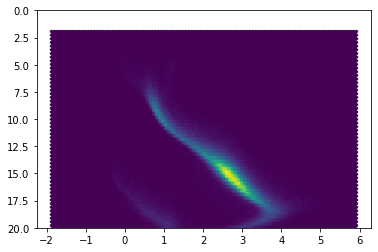

In [52]:
import matplotlib.pyplot as plt 
plt.hexbin(BpRp,Mg)
ymin, ymax = plt.ylim(20,0)

In [53]:
def value(s):
    try:
        return float(s)
    except ValueError:
        return 0

In [54]:
data = np.loadtxt('/Users/edm/Desktop/Gaia Data/EEM_dwarf_UBVIJHK_colors_Teff.txt',usecols=(11), comments='#',dtype='str',  converters={11: value})
#does not print with ... so hd to replace with 0's

In [55]:
data = data.astype('float64')

In [56]:
print(data)
len(data)

[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00 -1.20e-01 -8.70e-02 -3.70e-02  5.00e-03
  6.80e-02  1.10e-01  1.66e-01  1.94e-01  2.22e-01  2.63e-01  3.20e-01
  3.27e-01  3.77e-01  4.34e-01  4.90e-01  5.18e-01  5.46e-01  5.87e-01
  6.40e-01  6.70e-01  6.94e-01  7.19e-01  7.67e-01  7.84e-01  8.03e-01
  8.23e-01  8.32e-01  8.41e-01  8.50e-01  8.69e-01  8.80e-01  9.00e-01
  9.50e-01  9.83e-01  1.01e+00  1.10e+00  1.21e+00  1.34e+00  1.43e+00
  1.53e+00  1.70e+00  1.73e+00  1.79e+00  1.84e+00  1.97e+00  2.09e+00
  2.13e+00  2.23e+00  2.39e+00  2.50e+00  2.78e+00  2.94e+00  3.16e+00
  3.35e+00  3.71e+00  4.16e+00  4.50e+00  4.65e+00  4.72e+00  4.86e+00
  5.10e+00  4.78e+00  4.86e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00

118

In [57]:
def value2(s2):
    try:
        return float(s2)
    except ValueError:
        return 0

In [58]:
data2 = np.loadtxt('/Users/edm/Desktop/Gaia Data/EEM_dwarf_UBVIJHK_colors_Teff.txt',usecols=(30), comments='#',dtype='str',  converters={30: value2})


In [59]:
data2 = data2.astype('float64')
data21 = np.asarray(data2)
data11 = np.asarray(data)
new_data = data21[6 : 69]
print(new_data)
len(new_data)

new_data2 = data11[24 : 87]
print(new_data2)
len(new_data2)

[27.    25.    23.    21.3   19.8   18.5   17.7   15.    11.    10.
  7.3    6.     5.4    5.1    4.7    4.3    3.92   3.38   2.75   2.68
  2.18   2.05   1.98   1.86   1.93   1.88   1.83   1.77   1.81   1.75
  1.61   1.5    1.46   1.44   1.38   1.33   1.25   1.21   1.18   1.13
  1.08   1.06   1.03   1.     0.99   0.985  0.98   0.97   0.95   0.94
  0.9    0.88   0.86   0.82   0.78   0.73   0.7    0.69   0.64   0.62
  0.59   0.57   0.54 ]
[-1.20e-01 -8.70e-02 -3.70e-02  5.00e-03  6.80e-02  1.10e-01  1.66e-01
  1.94e-01  2.22e-01  2.63e-01  3.20e-01  3.27e-01  3.77e-01  4.34e-01
  4.90e-01  5.18e-01  5.46e-01  5.87e-01  6.40e-01  6.70e-01  6.94e-01
  7.19e-01  7.67e-01  7.84e-01  8.03e-01  8.23e-01  8.32e-01  8.41e-01
  8.50e-01  8.69e-01  8.80e-01  9.00e-01  9.50e-01  9.83e-01  1.01e+00
  1.10e+00  1.21e+00  1.34e+00  1.43e+00  1.53e+00  1.70e+00  1.73e+00
  1.79e+00  1.84e+00  1.97e+00  2.09e+00  2.13e+00  2.23e+00  2.39e+00
  2.50e+00  2.78e+00  2.94e+00  3.16e+00  3.35e+00  3.71e+00  

63

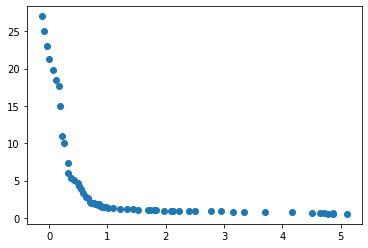

In [60]:
#concatanating 1d arrays code does not iterate over float
scatter = plt.scatter(new_data2,new_data)

In [61]:
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [62]:
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, new_data2, new_data, p0=[1,-0.5, 1])

In [63]:
perr_exponential = np.sqrt(np.diag(pcov_exponential))
print("pre-exponential factor = %0.2f (+/-) %0.2f" % (popt_exponential[0], perr_exponential[0]))
print("rate constant = %0.2f (+/-) %0.2f" % (popt_exponential[1], perr_exponential[1]))

pre-exponential factor = 20.38 (+/-) 0.46
rate constant = -2.92 (+/-) 0.13


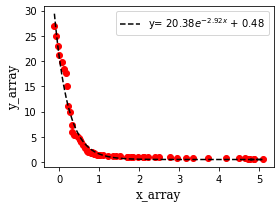

In [64]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize

from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(new_data2, new_data, "ro")
ax1.plot(new_data2, exponential(new_data2, *popt_exponential), 'k--', \
         label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))


ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.legend(loc='best')



fig.tight_layout()
fig.savefig("fittedExponential.png", format="png",dpi=1000)


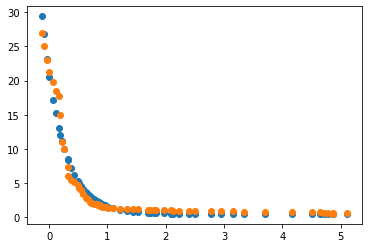

In [65]:
import math
#y = 20.38*np.exp(-2.92*x) + .48
#equation to approximate the mass

plt.scatter(new_data2, 20.38*np.exp(-2.92*new_data2) + .48)
scatter = plt.scatter(new_data2,new_data)

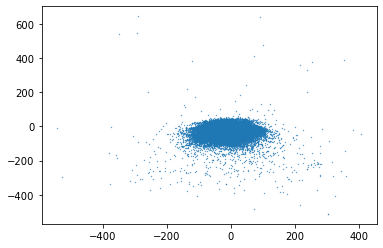

In [66]:
import matplotlib.pyplot as plt
plt.scatter(MVx, MVy, .1)

In [67]:
#transverse velocity
Tvel = (4.74047)*((np.sqrt((PMR**2) + (PMD**2)))/(Para))
print(Tvel)
len(Tvel)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



331312

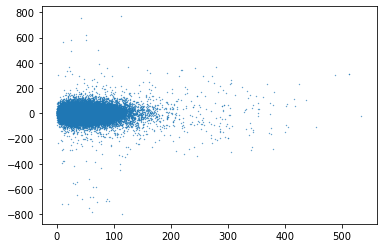

In [68]:
plt.scatter(Tvel, Rvel, .1)

In [69]:
vel = np.sqrt(Tvel**2 + Rvel**2)

Text(0, 0.5, 'd/pc')

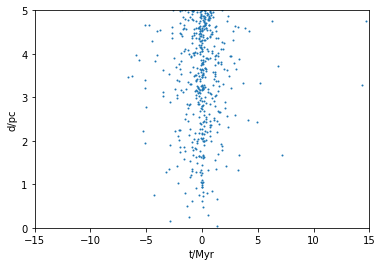

In [70]:

#time per year 
t = (-(10**3/Para))*(Rvel/(vel**2))
#Dont forget to make sure units work out
d = (10**3)*(1/Para)*(Tvel/(vel))
plt.scatter(t,d,1)

xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)

plt.xlabel("t/Myr")
plt.ylabel("d/pc")

In [71]:
len(d)

331312

In [72]:
len(t)

331312

In [73]:
#equation to find mass
y = (20.38*np.exp(-2.92*BpRp) + .48)
np.asarray(y)
print(y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [74]:
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
#area = (1.35)/(14.5*0.000068)
#df = pd.DataFrame({'T': t,'D': d,"bubble_size":area})


Text(0, 0.5, 'perihelion (d)/pc')

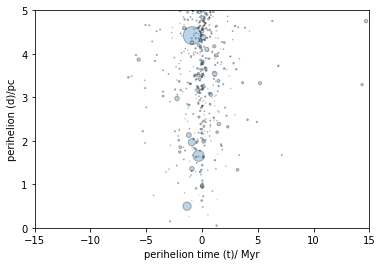

In [77]:

area = (y)/(med_d*med_v)
plt.scatter(t, d, area, alpha = .3, edgecolor = 'black')
#plt.scatter(t,d,1)
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
plt.xlabel("perihelion time (t)/ Myr")
plt.ylabel("perihelion (d)/pc")

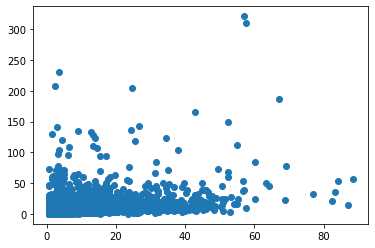

In [81]:
plt.scatter(y,area)

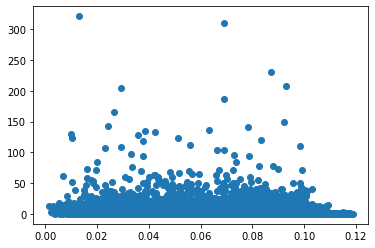

In [82]:
plt.scatter(med_d, area)

In [83]:
area_new = np.asarray(area)

In [84]:
area2 = (y/(med_v*(med_d**2)))
df = pd.DataFrame({'T': t,'D': d, "bubble_size":area2})

Text(0, 0.5, 'perihelion (d)/pc)')

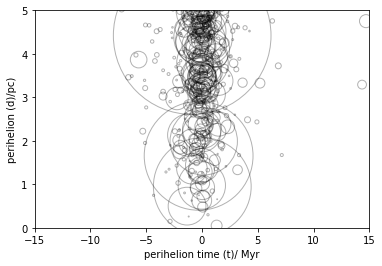

In [86]:
plt.scatter(t, d, area2, alpha = .3, edgecolor = 'black', facecolor = 'none')
#plt.scatter(t,d,1)
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
plt.xlabel("perihelion time (t)/ Myr")
plt.ylabel("perihelion (d)/pc)")